In [1]:

import pandas as pd
import numpy as np
import env
import matplotlib.pyplot as plt
import seaborn as sns
from wrangle import wrangle_zillow, wrangle_telco
import wrangle
sns.set_theme(style="dark")

 Do your work in a notebook named explore.ipynb. In addition, you should create a file named explore.py that contains the following functions for exploring your variables (features & target).

## 1) Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [2]:
train, validate, test = wrangle_telco()


In [3]:
train.head()

,monthly_charges,tenure,total_charges
customer_id,,,
3097-FQTVJ,20.00,41,810.30
3902-MIVLE,75.70,63,4676.70
0853-TWRVK,105.60,72,7581.50
0013-SMEOE,109.70,71,7904.25
4822-LPTYJ,103.75,72,7346.20


## 2) Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [4]:
def plot_variable_pairs(train,hue):
    sns.pairplot(train, hue = hue , kind = 'reg',plot_kws={'line_kws':{'color':'black'}})

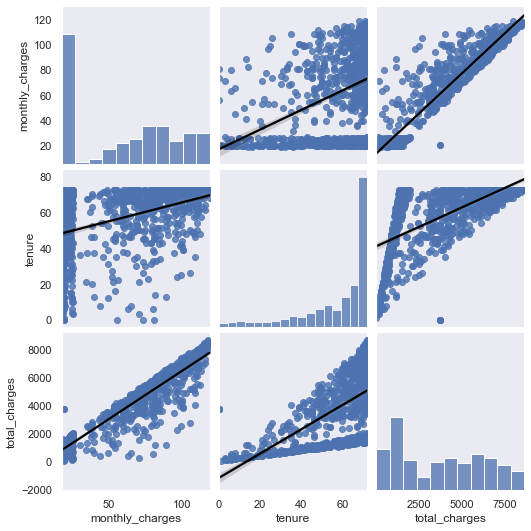

In [7]:
plot_variable_pairs(train, None)
    

## 3) Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [8]:
def months_to_years(df):
    df['tenure_years']=df.tenure//12
    return df

In [9]:
months_to_years(train)

,monthly_charges,tenure,total_charges,tenure_years
customer_id,,,,
3097-FQTVJ,20.00,41,810.30,3
3902-MIVLE,75.70,63,4676.70,5
0853-TWRVK,105.60,72,7581.50,6
0013-SMEOE,109.70,71,7904.25,5
4822-LPTYJ,103.75,72,7346.20,6
...,...,...,...,...
7113-HIPFI,65.85,66,4097.05,5
1814-WFGVS,48.90,72,3527.00,6
6257-DTAYD,104.15,71,7365.30,5


In [10]:
train.head()

,monthly_charges,tenure,total_charges,tenure_years
customer_id,,,,
3097-FQTVJ,20.00,41,810.30,3
3902-MIVLE,75.70,63,4676.70,5
0853-TWRVK,105.60,72,7581.50,6
0013-SMEOE,109.70,71,7904.25,5
4822-LPTYJ,103.75,72,7346.20,6


## 4) Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [11]:
def plot_categorical_and_continuous_vars(df, cat_vars, quant_vars):
    sns.barplot(data=df, y=quant_vars, x=cat_vars)
    plt.show()
    sns.violinplot(data=df, y=quant_vars, x=cat_vars)
    plt.show()
    sns.boxplot(data=df, y=quant_vars, x=cat_vars)

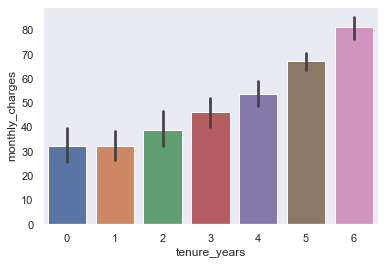

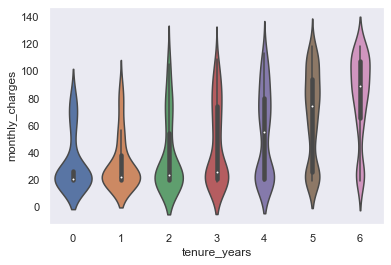

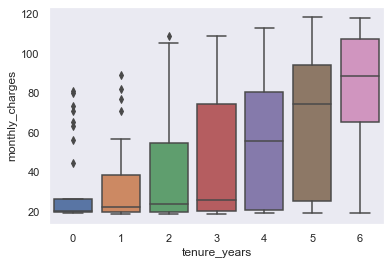

In [12]:
plot_categorical_and_continuous_vars(train,'tenure_years','monthly_charges' )

# Excercise 2

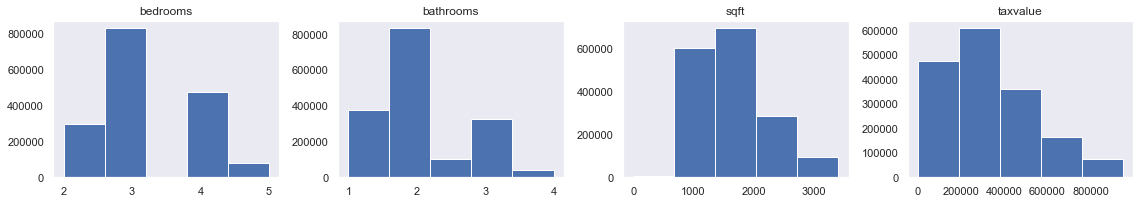

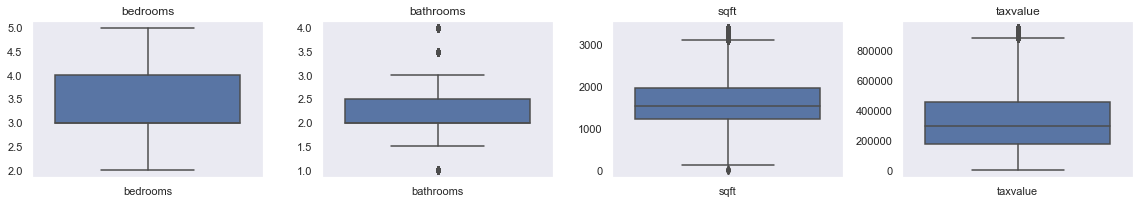

In [13]:
train, validate, test = wrangle_zillow()

In [14]:
train.head()

,bedrooms,bathrooms,sqft,taxvalue,yearbuilt,fips,bedrooms_scaled,bathrooms_scaled,sqft_scaled
1035436,5,3.0,3163,357428,1991,6037,1.000000,0.666667,0.928089
166117,4,2.0,1970,614000,1963,6059,0.666667,0.333333,0.577928
799068,3,3.0,2185,157151,1965,6037,0.333333,0.666667,0.641033
386062,4,2.5,2133,364656,1978,6059,0.666667,0.500000,0.625770
881965,3,2.5,1512,616143,1989,6059,0.333333,0.500000,0.443499


In [15]:
train['size_comparison'] = np.where(train.sqft > train.sqft.mean(), 'bigger than average', 'smaller than average')

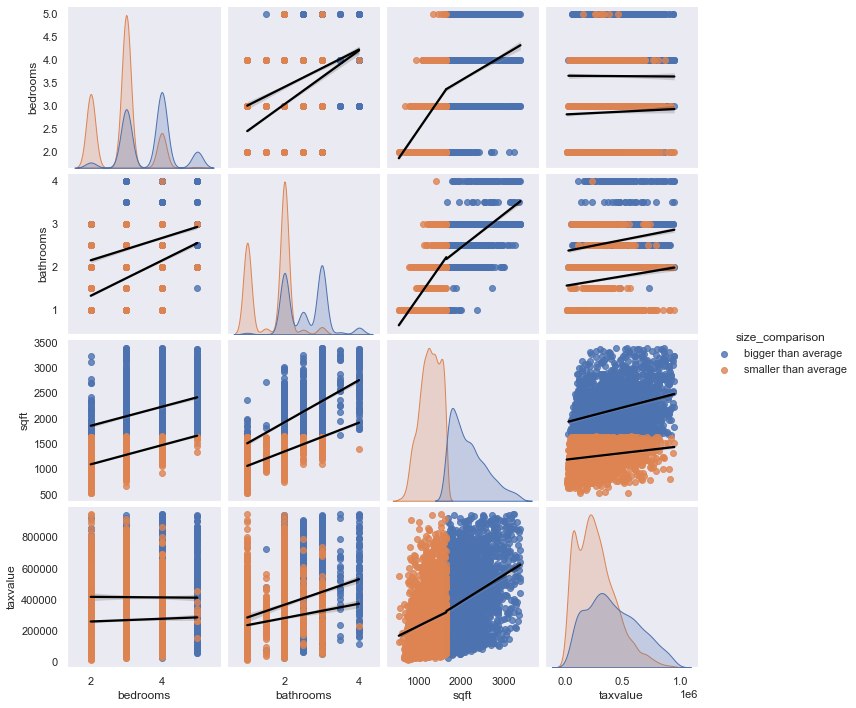

In [16]:
plot_variable_pairs(train.drop(columns=['yearbuilt','fips','bedrooms_scaled', 'bathrooms_scaled','sqft_scaled']).sample(5000), 'size_comparison')

In [17]:
def get_heatmap(df,target):
    heatmap = sns.heatmap(train.corr()[[target]].sort_values(by=target, ascending=False), vmin=-1, vmax=1, annot=True, cmap='rocket')
    heatmap.set_title(f'Features Correlating with {target}', fontdict={'fontsize':18}, pad=16);

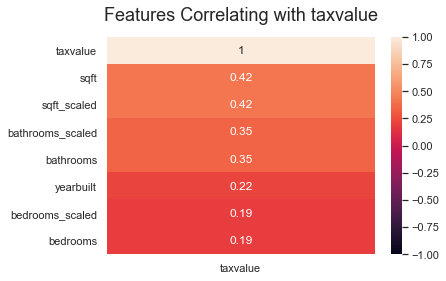

In [18]:
get_heatmap(train,'taxvalue')

<AxesSubplot:xlabel='sqft', ylabel='taxvalue'>

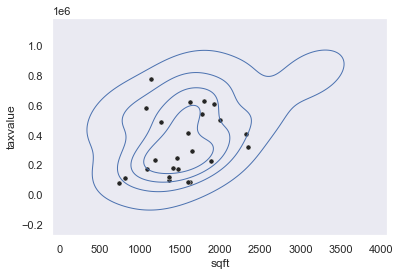

In [19]:
sns.scatterplot(x=train.sqft.sample(5000), y=train.taxvalue.sample(5000), s=25, color=".15")
sns.kdeplot(x=train.sqft.sample(5000), y=train.taxvalue.sample(5000), levels=5, color="b", linewidths=1)